In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import csv
import pandas as pd
        
datos = pd.read_csv('dataset.csv')
datos.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
Blues,blues.00049.wav,0.277484,0.088607,1318.656822,1904.761177,3046.681577,0.039973,-255.965774,110.823046,21.505215,...,-2.442929,-7.130865,-11.163917,-12.609408,2.742009,-8.948849,-7.940728,-2.344157,-0.705606,Blues
Blues,blues.00045.wav,0.429511,0.148366,1739.019621,2290.401739,4551.155813,0.048052,-163.211141,89.791041,12.979256,...,6.008639,-2.910059,-0.434613,-17.545474,4.154533,-5.990226,-7.860423,-8.565096,1.857711,Blues
Blues,blues.00040.wav,0.397725,0.134892,2272.495079,2356.855937,5108.319111,0.097657,-110.260079,90.701812,-2.527487,...,5.952405,-8.033586,4.239868,-16.485552,6.542503,-5.695943,-3.640864,-4.856884,1.854516,Blues
Blues,blues.00010.wav,0.303954,0.142939,1410.469096,1512.620983,2767.274933,0.062981,-173.707514,137.156400,-23.766517,...,1.800535,-2.988374,-1.869389,-0.800155,-3.023782,-0.445196,-1.998228,-0.743599,-4.986112,Blues
Blues,blues.00097.wav,0.375158,0.198282,1236.574280,1602.309124,2604.150920,0.044626,-148.639173,145.746311,-9.363639,...,3.230693,-0.667060,-0.727791,-6.821160,-3.942547,-15.739370,-5.604688,-5.802770,-0.048729,Blues


In [2]:
datos = datos.drop(['filename'],axis=1)

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Etiquetar
lista = datos.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(lista)

# Extraer los datos y escalar las caracteristicas

In [4]:
scaler = StandardScaler()
x = scaler.fit_transform(np.array(datos.iloc[:, :-1], dtype = float))

In [5]:
x.shape

(1000, 26)

In [6]:
y.shape

(1000,)

# Principal Component Analysis

In [ ]:
# Matriz de covarianza

from numpy.core.numeric import dot,newaxis
def covarianza(matriz):
        matriz = np.array(matriz, dtype=float)
        tup = (slice(None),newaxis)
        matriz -= matriz.mean(axis=1)[tup]
        return (dot(matriz, matriz.T) /float((matriz.shape[1])-1))

In [ ]:
c = covarianza(x.T)

In [ ]:
# Eigenvalores y Eigenvectores
eigen_vals, eigen_vecs = np.linalg.eig(c)

In [ ]:
print('\nEigenvalues {}'.format(eigen_vals))

In [ ]:
# Visualizar cuantas caracteristicas si son importantes
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 27), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 27), cum_var_exp, where='mid', label='cumilative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [ ]:
# Ordenar los eigenvalores

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs

In [ ]:
#Matriz de 26 x 6 de los primeros 6 eigenvectores
matriz_w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

for i in range(2,6):
    matriz_w = np.hstack((matriz_w, eigen_pairs[i][1][:, np.newaxis]))

In [ ]:
matriz_w

In [ ]:
matriz_w.shape

In [ ]:
# Convertir de 1000 x 26 a 1000 * 6
x_transformado = x.dot(matriz_w)
x_transformado

In [ ]:
x_transformado.shape

In [ ]:
from sklearn.model_selection import train_test_split

#Dividir training set y testing set
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.8, random_state =  1997)

# Hallar los k - valores apropiados

Text(0.5, 1.0, 'Elbow Method')

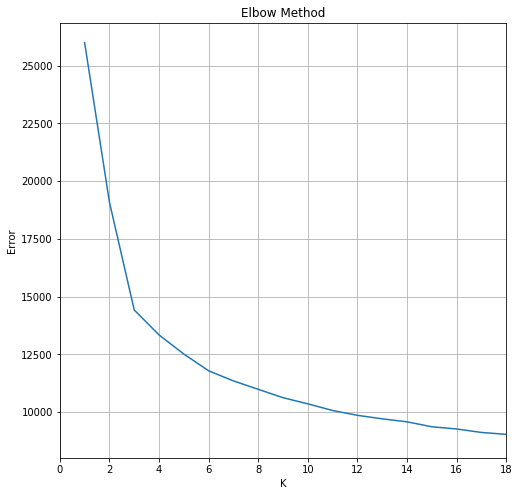

In [8]:
from sklearn.cluster import  KMeans

Ks = np.arange(1, 20)
km = [KMeans(n_clusters=i, random_state=1986) for i in Ks]
score = [-km[i].fit(x).score(x) for i in range(len(km))]
Ks.dtype = int
plt.figure(figsize=(8,8))
plt.plot(Ks,score)
plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Elbow Method')

Text(0.5, 0, 'K')

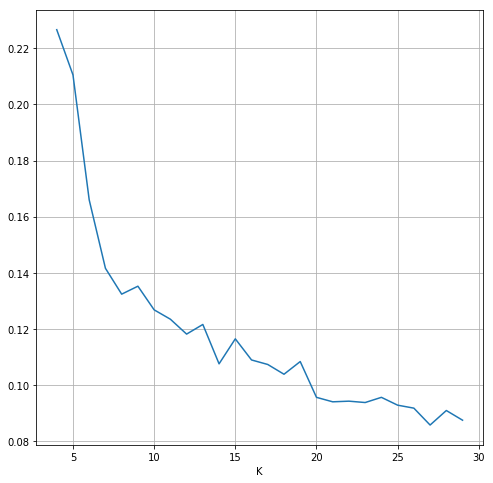

In [12]:
from sklearn.metrics import silhouette_score

Ks = np.arange(2, 30)
kms = [KMeans(n_clusters=i, random_state=1986).fit(x) for i in Ks]
s_scores = [silhouette_score(x,kms[i].labels_) for i in range(2,len(Ks))]
plt.figure(figsize=(8,8))
plt.plot(Ks[2:len(Ks)],s_scores)
#plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')

In [13]:
audio_cols = ['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1' , 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']

km = KMeans(n_clusters=10, n_init=10, random_state=1986)
km.fit(x)
labels = km.labels_
cluster_centers = km.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = 10
km_clusters = pd.DataFrame(cluster_centers, columns=audio_cols)
km_clusters['cluster'] = ['KM{}'.format(l) for l in labels_unique]
km_clusters['method'] = 'KMeans'
cols = ['cluster'] + audio_cols + ['method']
km_clusters = km_clusters[cols]

In [14]:
km_clusters

,cluster,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,method
0,KM0,-1.370962,0.087786,-1.018240,-0.430844,-0.853892,-1.332399,-0.833209,0.295985,1.176681,...,-1.902963,-1.506738,-1.625832,-1.215807,-2.609947,-2.035434,-2.246688,-2.500978,-3.499779,KMeans
1,KM1,0.497705,0.589728,0.287472,0.613333,0.355052,-0.191736,0.347421,-0.578911,0.558298,...,-0.065994,1.150859,0.119042,1.037584,0.182614,0.711484,0.277894,0.413688,0.219442,KMeans
2,KM2,-1.560380,-1.459067,-1.284084,-1.407801,-1.403950,-0.802011,-2.000455,1.370619,-0.246327,...,-0.719782,0.585713,-0.406929,0.836987,0.166468,1.258490,0.249825,0.759478,0.176182,KMeans
3,KM3,-0.118166,-0.174107,-0.633399,-0.496598,-0.527278,-0.701604,-0.236322,0.530167,-0.202889,...,0.523083,-0.301131,0.365206,-0.218132,0.230592,-0.253908,0.027682,-0.102224,-0.158501,KMeans
4,KM4,-0.029289,-0.012451,0.464386,0.740902,0.494581,0.190553,0.285152,-0.532177,0.531562,...,-0.840068,0.511158,-0.858886,0.323206,-0.804431,0.069638,-0.716017,-0.101004,-0.529673,KMeans
5,KM5,1.114919,0.434750,0.527225,0.130273,0.429334,0.808188,0.684068,-0.500009,-0.695139,...,1.330488,-0.709554,1.314021,-0.685491,1.157518,-0.402427,0.931970,-0.240034,0.897657,KMeans
6,KM6,-0.619029,-0.482463,-1.208048,-1.002464,-1.178069,-1.167554,-0.848441,0.969346,0.322853,...,-0.455293,0.653788,-0.084510,0.542341,-0.340913,0.236187,-0.467899,0.714737,-0.107276,KMeans
7,KM7,-1.069169,-0.608764,-1.066422,-1.134873,-1.134244,-0.807740,-0.775079,1.209297,-0.358534,...,-1.047262,-0.125998,-1.156654,-0.238527,-1.185002,-0.221618,-1.148132,-0.301910,-0.814005,KMeans
8,KM8,0.557482,0.991299,1.640354,1.669452,1.684261,1.205096,0.875604,-1.387790,1.082491,...,-0.498754,0.766440,-0.358860,0.738931,-0.310578,0.761044,0.041548,0.787679,0.308624,KMeans
9,KM9,0.250307,-0.031701,0.213804,-0.071312,0.168334,0.529783,0.487641,-0.066108,-0.806824,...,0.854533,-1.385820,0.484876,-1.274964,0.536885,-1.137062,0.481698,-0.974977,0.093042,KMeans


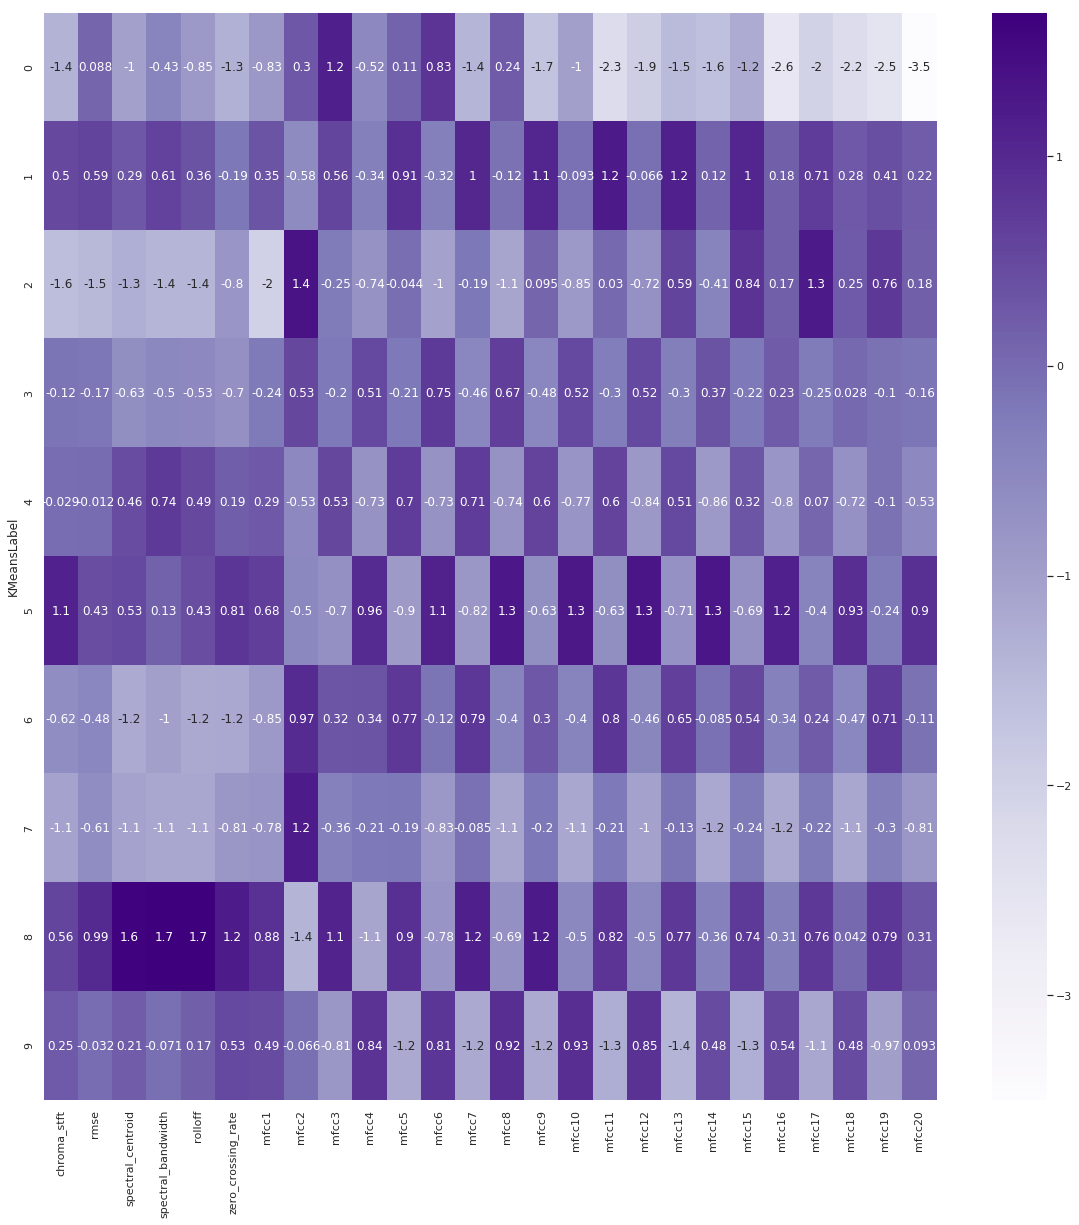

In [15]:
import seaborn as sns

plt.figure(figsize=(20,20))
sns.set(font_scale=1)
sns.heatmap(
    data=km_clusters.loc[km_clusters.method=='KMeans', audio_cols],
    cmap='Purples',
    annot=True
)
plt.ylabel("KMeansLabel")
plt.savefig('heatmap_all.png')

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit_transform(x)
xx,yy = zip(*X_new)
datos['xx'] = xx
datos['yy'] = yy
components = pca.components_
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_

In [18]:
audio_components = dict(list(zip(audio_cols, zip(*np.round(components,2)))))
audio_components

{'chroma_stft': (0.16, 0.26),
 'rmse': (0.06, 0.24),
 'spectral_centroid': (0.06, 0.36),
 'spectral_bandwidth': (-0.02, 0.36),
 'rolloff': (0.05, 0.36),
 'zero_crossing_rate': (0.12, 0.27),
 'mfcc1': (0.14, 0.27),
 'mfcc2': (-0.05, -0.35),
 'mfcc3': (-0.18, 0.13),
 'mfcc4': (0.24, -0.08),
 'mfcc5': (-0.25, 0.12),
 'mfcc6': (0.28, -0.01),
 'mfcc7': (-0.25, 0.18),
 'mfcc8': (0.29, 0.04),
 'mfcc9': (-0.22, 0.2),
 'mfcc10': (0.28, 0.06),
 'mfcc11': (-0.22, 0.16),
 'mfcc12': (0.28, 0.06),
 'mfcc13': (-0.25, 0.12),
 'mfcc14': (0.23, 0.08),
 'mfcc15': (-0.23, 0.1),
 'mfcc16': (0.2, 0.07),
 'mfcc17': (-0.19, 0.09),
 'mfcc18': (0.15, 0.1),
 'mfcc19': (-0.15, 0.09),
 'mfcc20': (0.09, 0.13)}

In [19]:
components

array([[ 0.15750582,  0.05561711,  0.0574533 , -0.0150956 ,  0.04592882,
         0.11974928,  0.13925357, -0.0502278 , -0.18185693,  0.23881511,
        -0.24722585,  0.27593969, -0.24765181,  0.29397243, -0.2242241 ,
         0.28413817, -0.22236792,  0.28003053, -0.24631895,  0.22855912,
        -0.22708602,  0.20040562, -0.1890193 ,  0.15377912, -0.15246124,
         0.09459368],
       [ 0.25704173,  0.24291229,  0.35592343,  0.35623335,  0.36023094,
         0.27204858,  0.27349239, -0.35069671,  0.13047871, -0.07739774,
         0.1182116 , -0.00944076,  0.17618804,  0.03518951,  0.20296479,
         0.06347919,  0.15938378,  0.06115316,  0.11547657,  0.07825034,
         0.09739517,  0.0707386 ,  0.08848425,  0.09888595,  0.0860358 ,
         0.13073916]])

In [20]:
singular_values

array([91.57307488, 81.50910381])

In [27]:
descriptive_labels = ['KM0','KM1','KM2','KM3','KM4','KM5','KM6','KM7','KM8','KM9']
unique_labels = np.unique(labels)
translated_labels = dict(zip(unique_labels, descriptive_labels))
datos['KMeansLabel'] = list(map(lambda x:translated_labels[x], labels))

/home/alopolisia/.local/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


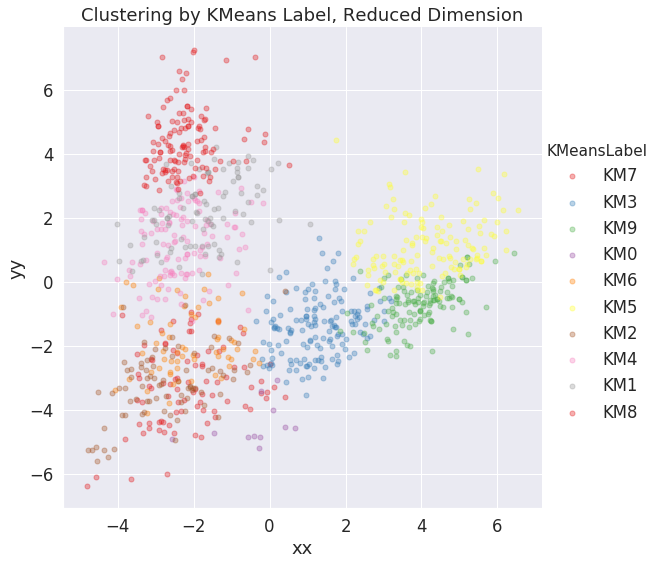

In [28]:

sns.set(font_scale=1.5)

sns.lmplot(data=datos, x='xx', y='yy', hue='KMeansLabel', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
plt.title("Clustering by KMeans Label, Reduced Dimension")

plt.savefig('pca_scatter_KM.png')

In [ ]:
https://github.com/victoreram/Springboard-Data-Science/blob/master/GenreClustering/GenreClustering.ipynb